In [1]:
pwd

'C:\\Users\\MILP\\Dropbox\\sh'

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# seed 값 설정 (환경을 같게 만들어주어, 딥러닝 실행시 같은 값이 나올 수 있게 해줌)
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [24]:
# 데이터 입력
df_pre = pd.read_csv('./data/wine.csv', header=None)
df_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,1
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,1
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,1
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1


In [25]:
# 데이터 샘플링
df = df_pre.sample(frac=1)  # 랜덤 샘플을 가져오는데, 원본 데이터의 100%를 가져오라는 뜻(frac=0.5로 지정하면 50%만 랜덤으로 가져옴)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
1471,6.7,0.700,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6,5,1
4282,7.1,0.310,0.17,1.00,0.042,21.0,144.0,0.99304,3.13,0.40,9.6,5,0
4559,7.7,0.110,0.34,14.05,0.040,41.0,114.0,0.99634,3.07,0.59,11.0,7,0
2088,7.4,0.260,0.31,7.60,0.047,52.0,177.0,0.99620,3.13,0.45,8.9,6,0
2152,7.0,0.300,0.51,13.60,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7,0
4992,8.0,0.280,0.30,8.40,0.030,35.0,115.0,0.99192,2.93,0.42,12.3,6,0
5776,6.4,0.250,0.33,1.70,0.037,35.0,113.0,0.99164,3.23,0.66,10.6,6,0
3785,6.5,0.390,0.81,1.20,0.217,14.0,74.0,0.99360,3.08,0.53,9.5,5,0
712,8.7,0.690,0.00,3.20,0.084,13.0,33.0,0.99920,3.36,0.45,9.4,5,1
2388,7.6,0.300,0.27,10.60,0.039,31.0,119.0,0.99815,3.27,0.30,9.3,6,0


In [26]:
dataset = df.values
dataset

array([[ 6.7 ,  0.7 ,  0.08, ..., 12.6 ,  5.  ,  1.  ],
       [ 7.1 ,  0.31,  0.17, ...,  9.6 ,  5.  ,  0.  ],
       [ 7.7 ,  0.11,  0.34, ..., 11.  ,  7.  ,  0.  ],
       ...,
       [ 6.3 ,  0.35,  0.26, ...,  8.8 ,  5.  ,  0.  ],
       [ 7.  ,  0.22,  0.32, ..., 10.5 ,  6.  ,  0.  ],
       [ 6.4 ,  0.23,  0.35, ...,  9.2 ,  5.  ,  0.  ]])

In [27]:
X = dataset[:, 0:12]
Y = dataset[:, 12]

### 데이터 확인

In [28]:
X

array([[ 6.7 ,  0.7 ,  0.08, ...,  0.52, 12.6 ,  5.  ],
       [ 7.1 ,  0.31,  0.17, ...,  0.4 ,  9.6 ,  5.  ],
       [ 7.7 ,  0.11,  0.34, ...,  0.59, 11.  ,  7.  ],
       ...,
       [ 6.3 ,  0.35,  0.26, ...,  0.49,  8.8 ,  5.  ],
       [ 7.  ,  0.22,  0.32, ...,  0.44, 10.5 ,  6.  ],
       [ 6.4 ,  0.23,  0.35, ...,  0.47,  9.2 ,  5.  ]])

In [29]:
Y

array([1., 0., 0., ..., 0., 0., 0.])

In [30]:
# 모델 설정
model = Sequential()
model.add(Dense(32,  input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

## 체크포인트 만들어서 모델 저장하기

In [32]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

## 얼리스타핑 만들어서 과적합 방지

In [33]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 1. 그래프 없이 오차 및 정확도 측정[checkpointer, early_stopping_callback]

In [18]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=1000, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])
# 앞서 저장한 모델보다 나은 결과값(테스트 오차값이 감소)이 나올 때만 모델을 저장한다.


Epoch 00001: val_loss did not improve from 0.05839

Epoch 00002: val_loss improved from 0.05839 to 0.05783, saving model to ./model/02-0.0578.hdf5

Epoch 00003: val_loss improved from 0.05783 to 0.05748, saving model to ./model/03-0.0575.hdf5

Epoch 00004: val_loss did not improve from 0.05748

Epoch 00005: val_loss did not improve from 0.05748

Epoch 00006: val_loss did not improve from 0.05748

Epoch 00007: val_loss improved from 0.05748 to 0.05723, saving model to ./model/07-0.0572.hdf5

Epoch 00008: val_loss did not improve from 0.05723

Epoch 00009: val_loss did not improve from 0.05723

Epoch 00010: val_loss did not improve from 0.05723

Epoch 00011: val_loss did not improve from 0.05723

Epoch 00012: val_loss did not improve from 0.05723

Epoch 00013: val_loss did not improve from 0.05723

Epoch 00014: val_loss did not improve from 0.05723

Epoch 00015: val_loss did not improve from 0.05723

Epoch 00016: val_loss did not improve from 0.05723

Epoch 00017: val_loss did not impro

In [19]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

6497/6497 [==============================] - 0s 11us/step

 Accuracy: 0.9809


## 2. 그래프로 테스트셋 오차, 학습셋 정확도 확인

In [34]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=1000, batch_size=200, verbose=1, callbacks=[checkpointer, early_stopping_callback])

Train on 5197 samples, validate on 1300 samples
Epoch 1/1000
5197/5197 [==============================] - 0s 35us/step - loss: 0.5127 - accuracy: 0.8482 - val_loss: 0.3040 - val_accuracy: 0.8600

Epoch 00001: val_loss improved from inf to 0.30396, saving model to ./model/01-0.3040.hdf5
Epoch 2/1000
5197/5197 [==============================] - 0s 6us/step - loss: 0.2780 - accuracy: 0.8913 - val_loss: 0.2642 - val_accuracy: 0.9023

Epoch 00002: val_loss improved from 0.30396 to 0.26418, saving model to ./model/02-0.2642.hdf5
Epoch 3/1000
5197/5197 [==============================] - 0s 6us/step - loss: 0.2259 - accuracy: 0.9221 - val_loss: 0.2187 - val_accuracy: 0.9285

Epoch 00003: val_loss improved from 0.26418 to 0.21872, saving model to ./model/03-0.2187.hdf5
Epoch 4/1000
5197/5197 [==============================] - 0s 6us/step - loss: 0.2034 - accuracy: 0.9319 - val_loss: 0.2086 - val_accuracy: 0.9308

Epoch 00004: val_loss improved from 0.21872 to 0.20861, saving model to ./model/04

5197/5197 [==============================] - 0s 12us/step - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.0965 - val_accuracy: 0.9785

Epoch 00036: val_loss improved from 0.09905 to 0.09650, saving model to ./model/36-0.0965.hdf5
Epoch 37/1000
5197/5197 [==============================] - 0s 8us/step - loss: 0.0804 - accuracy: 0.9742 - val_loss: 0.1041 - val_accuracy: 0.9700

Epoch 00037: val_loss did not improve from 0.09650
Epoch 38/1000
5197/5197 [==============================] - 0s 7us/step - loss: 0.0786 - accuracy: 0.9734 - val_loss: 0.1147 - val_accuracy: 0.9738

Epoch 00038: val_loss did not improve from 0.09650
Epoch 39/1000
5197/5197 [==============================] - 0s 8us/step - loss: 0.0846 - accuracy: 0.9721 - val_loss: 0.0954 - val_accuracy: 0.9723

Epoch 00039: val_loss improved from 0.09650 to 0.09539, saving model to ./model/39-0.0954.hdf5
Epoch 40/1000
5197/5197 [==============================] - 0s 8us/step - loss: 0.0772 - accuracy: 0.9744 - val_loss: 0.0930 - val


Epoch 00074: val_loss did not improve from 0.08530
Epoch 75/1000
5197/5197 [==============================] - 0s 12us/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0938 - val_accuracy: 0.9785

Epoch 00075: val_loss did not improve from 0.08530
Epoch 76/1000
5197/5197 [==============================] - 0s 10us/step - loss: 0.0572 - accuracy: 0.9806 - val_loss: 0.0854 - val_accuracy: 0.9792

Epoch 00076: val_loss did not improve from 0.08530


In [35]:
# y_vloss에 테스트셋 오차를 저장
y_vloss = history.history['val_loss']

# y_acc 에 학습셋 정확도를 저장
y_acc = history.history['accuracy']

# y_val_accuracy에 테스트셋 정확도를 저장
y_val_accuracy = history.history['val_accuracy']

In [36]:
y_val_accuracy

[0.8600000143051147,
 0.9023076891899109,
 0.9284615516662598,
 0.9307692050933838,
 0.9292307496070862,
 0.926153838634491,
 0.9292307496070862,
 0.9292307496070862,
 0.9346153736114502,
 0.936923086643219,
 0.9376922845840454,
 0.939230740070343,
 0.939230740070343,
 0.9399999976158142,
 0.942307710647583,
 0.9453846216201782,
 0.9453846216201782,
 0.947692334651947,
 0.949999988079071,
 0.9515384435653687,
 0.947692334651947,
 0.9576923251152039,
 0.9584615230560303,
 0.9592307806015015,
 0.9676923155784607,
 0.9653846025466919,
 0.9684615135192871,
 0.9700000286102295,
 0.9700000286102295,
 0.9553846120834351,
 0.9684615135192871,
 0.9707692265510559,
 0.9730769395828247,
 0.9738461375236511,
 0.9738461375236511,
 0.9784615635871887,
 0.9700000286102295,
 0.9738461375236511,
 0.9723076820373535,
 0.9746153950691223,
 0.9784615635871887,
 0.9761538505554199,
 0.9746153950691223,
 0.9761538505554199,
 0.9738461375236511,
 0.9769230484962463,
 0.9792307615280151,
 0.9761538505554199,


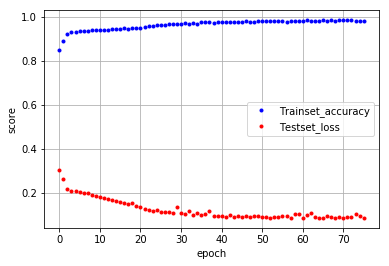


 Test Accuracy: 0.9792


In [37]:
# x값을 지정하고 테스트셋 정확도를 파란색으로, 학습셋 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='Trainset_accuracy')
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='Testset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('score')

plt.show()

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % y_val_accuracy[-1])